In [1]:
from pandas import *
import statsmodels.api as sm
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('ggplot')
import numpy as np
import statsmodels.api as sm
import datetime as dt


df = DataFrame.from_csv('energystocksdec16.csv')
df.describe()

,EOG,HAL,PXD,SLB,WLL,XES,XOP,EOG-RET,HAL-RET,PXD-RET,SLB-RET,WLL-RET,XES-RET,XOP-RET
count,7100.000000,11718.000000,7566.000000,11718.000000,3414.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2739.000000,2738.000000,2738.000000
mean,28.517125,17.587503,49.048526,29.757048,33.246315,31.903417,48.481008,0.000752,0.000473,0.000952,0.000417,0.000662,0.000220,0.000375
std,29.394693,13.890858,51.542809,28.858213,19.242035,8.922359,12.668377,0.024736,0.025563,0.028234,0.022784,0.040004,0.024339,0.024491
min,2.090000,2.770000,5.130000,2.200000,3.530000,13.060000,23.010000,-0.159291,-0.171040,-0.222006,-0.184041,-0.287072,-0.169249,-0.179622
25%,5.230000,7.350000,14.660000,8.490000,18.560000,25.880000,38.480000,-0.011773,-0.011411,-0.013199,-0.010677,-0.016092,-0.011377,-0.011590
50%,10.750000,10.820000,26.445000,14.810000,27.715000,32.240000,48.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,47.275000,24.397500,53.745000,41.520000,47.252500,39.185000,57.345000,0.013674,0.013672,0.014986,0.011871,0.018443,0.012884,0.012972
max,117.980000,74.020000,233.070000,117.950000,92.660000,51.700000,83.450000,0.204061,0.235497,0.189735,0.149144,0.302772,0.195467,0.219199


In [2]:
df.columns

Index(['EOG', 'HAL', 'PXD', 'SLB', 'WLL', 'XES', 'XOP', 'EOG-RET', 'HAL-RET',
       'PXD-RET', 'SLB-RET', 'WLL-RET', 'XES-RET', 'XOP-RET'],
      dtype='object')

In [3]:
df.head(5)

,EOG,HAL,PXD,SLB,WLL,XES,XOP,EOG-RET,HAL-RET,PXD-RET,SLB-RET,WLL-RET,XES-RET,XOP-RET
Date,,,,,,,,,,,,,,
42724.0,103.40,53.63,186.54,85.74,12.42,22.85,42.19,-0.000773,-0.001582,0.002795,0.007284,0.021382,0.010168,-0.000711
42723.0,103.48,53.72,186.02,85.12,12.16,22.62,42.22,-0.005000,-0.005001,0.005568,-0.004444,0.011647,0.000000,0.004999
42720.0,104.00,53.99,184.99,85.50,12.02,22.62,42.01,0.000770,0.003718,-0.013123,0.002580,0.009236,-0.003524,0.001908
42719.0,103.92,53.79,187.45,85.28,11.91,22.70,41.93,-0.002783,0.005233,-0.000746,0.001409,0.066249,0.010236,0.004552
42718.0,104.21,53.51,187.59,85.16,11.17,22.47,41.74,-0.035182,-0.025319,-0.019137,-0.011262,-0.067613,-0.036862,-0.038692


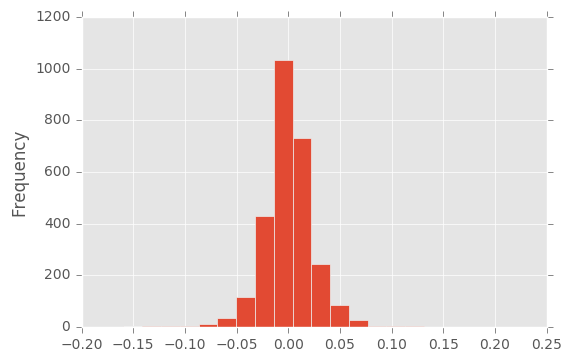

In [4]:
##df.EOG = dfxop.EOG.astype(float)
hist_ex = df['EOG-RET'].plot(kind='hist', bins=20)

In [5]:
df.applymap(np.isreal)

,EOG,HAL,PXD,SLB,WLL,XES,XOP,EOG-RET,HAL-RET,PXD-RET,SLB-RET,WLL-RET,XES-RET,XOP-RET
Date,,,,,,,,,,,,,,
42724.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42723.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42720.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42719.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42718.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42717.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42716.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42713.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True
42712.0,True,True,True,True,True,True,True,True,True,True,True,True,True,True


###### 161228-1914-06@kaben troubleshooting pandas_datareader
@carrier4 had noted that the code below didn't work. @kaben got it to work after some experimenting; @kaben is not sure of the exact cause of the problem, but here are some thoughts. First, the original code was as follows:

In [6]:
## - this code didn't work - needs some help to download data from web

import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
##goog = web.DataReader('GOOG','google', start=datetime.datetime(2009,3,18),end=(2016,12,16))
##goog.tail()
## - separate call from yahoo.com website - did not work either
##goog = web.DataReader('GOOG','yahoo', start=datetime.datetime(2009,3,18),end=(2016,12,16)) goog.tail()

@kaben changed the syntax; this seems to solve the problem; had earlier observed csv parsing issues inside of pandas_datareader, due to a Byte Order Mark (BOM) (http://unicode.org/faq/utf_bom.html) at the beginning of .csv files obtained from Google Finance. But this issue is no longer observed. It's possible this was resolved by an update in Pandas.

In [7]:
import numpy as np
import pandas as pd
import datetime
import pandas_datareader.data as web
goog = web.DataReader('GOOG', data_source='google', start=datetime.datetime(2009,3,18), end=datetime.datetime(2016,12,16))
goog.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2016-12-12,785.04,791.25,784.36,789.27,2104117.0
2016-12-13,793.90,804.38,793.34,796.10,2145209.0
2016-12-14,797.40,804.00,794.01,797.07,1704150.0
2016-12-15,797.34,803.00,792.92,797.85,1626499.0
2016-12-16,800.40,800.86,790.29,790.80,2443796.0


The revised syntax seems to also work for Yahoo data:

In [8]:
goog = web.DataReader('GOOG', data_source='yahoo', start=datetime.datetime(2009,3,18), end=datetime.datetime(2016,12,16))
goog.tail()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-12,785.039978,791.250000,784.354980,789.270020,2097100,789.270020
2016-12-13,793.900024,804.380005,793.340027,796.099976,2119800,796.099976
2016-12-14,797.400024,804.000000,794.010010,797.070007,1664500,797.070007
2016-12-15,797.340027,803.000000,792.919983,797.849976,1623700,797.849976
2016-12-16,800.400024,800.856018,790.289978,790.799988,2428300,790.799988


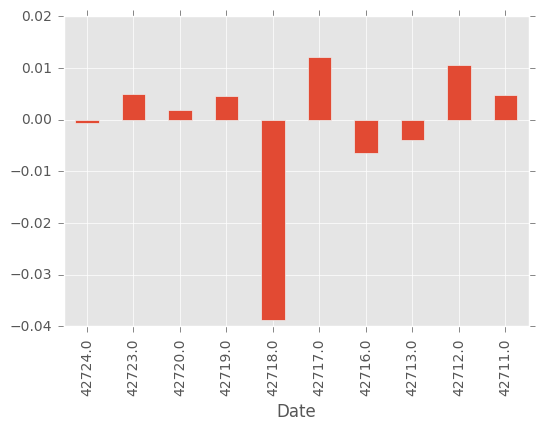

In [9]:
##import datetime as dt
##df['DATE'] = df['DATE'].apply(lambda x: dt.datetime.strptime(x,'%d%b%Y:%H:%M:%S.%f'))
## -- need to convert the date field to a readable date . . .
##PLOTTING LAST 10 DAYS OF RETURNS FOR XOP
df['XOP-RET'].head(10).plot(kind='bar')


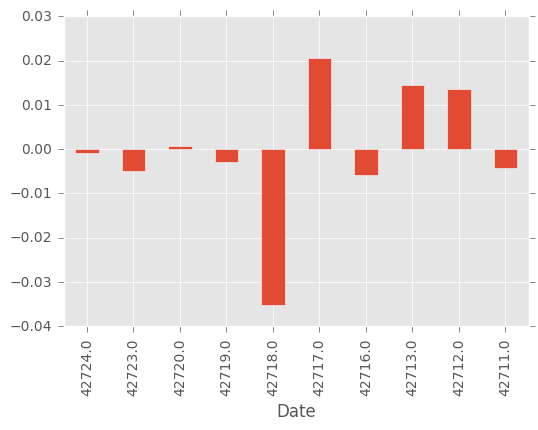

In [10]:
##PLOTTING LAST 10 DAYS OF RETURNS FOR EOG
df['EOG-RET'].head(10).plot(kind='bar')

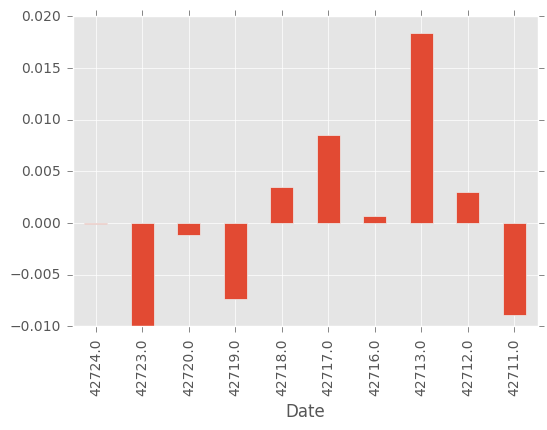

In [11]:
rel_ret_EOG = (df['EOG-RET'] - df['XOP-RET'])
rel_ret_EOG.head(10).plot(kind='bar')

##not sure why this is giving me the XOP-RET return and not (EOG-RET - XOP-RET) //(seems to be working now)